<a href="https://colab.research.google.com/github/Eternoxy/OpenBrakes/blob/main/OpenBrakesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install gpxpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.6/111.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gpxpy: filename=gpxpy-1.5.0-py3-none-any.whl size=42881 sha256=49129f0c4bc7ccce13503fc6d0d2c022c2f58a80afcd3f64f66975c8c041e740
  Stored in directory: /root/.cache/pip/wheels/37/e1/72/25e1b018a67df6cb99583bef9b53b53e9ef59826ee514751aa
Successfully built gpxpy


In [34]:
import pandas as pd
import gpxpy
import matplotlib.pyplot as plt
import numpy as np

# Load brake data
brake_data = pd.read_csv('/brakedata.csv')

# Load and parse GPX data
with open('/activity_11926132458.gpx', 'r') as gpx_file:
    gpx = gpxpy.parse(gpx_file)

# Convert GPX data to DataFrame
data = []
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            data.append([point.time, point.latitude, point.longitude, point.elevation])

gpx_data = pd.DataFrame(data, columns=['time', 'latitude', 'longitude', 'elevation'])


In [18]:
# Convert the Unix timestamp in brakedata dataframe to a datetime format
brake_data['Timestamp'] = pd.to_datetime(brake_data['Timestamp'], unit='s')

In [21]:
brake_data.head()

,Timestamp,Torque,Temperature,RPM
0,2023-09-21 18:21:12,-0.26,23.85,0.0
1,2023-09-21 18:21:13,-0.27,23.86,0.0
2,2023-09-21 18:21:14,-0.28,23.83,0.0
3,2023-09-21 18:21:15,-0.29,23.83,0.0
4,2023-09-21 18:21:16,-0.30,23.83,0.0


In [22]:
# Set timezone info for both dataframes
brake_data['Timestamp'] = brake_data['Timestamp'].dt.tz_localize('UTC')
gpx_data['time'] = pd.to_datetime(gpx_data['time']).dt.tz_convert('UTC')

In [37]:
# Start timestamp from the provided data
start_time = pd.Timestamp("2023-09-01 14:11:56+00:00")

# Generate a timestamp series for 8500 entries, assuming 1-second intervals for simplicity
timestamps = [start_time + pd.Timedelta(seconds=i) for i in range(8000)]

# Generate example data for Torque, Temperature, and RPM
# Using numpy to create random data for demonstration. You can adjust the range and patterns as needed.
torques = np.random.uniform(-10, 10, 8000) # Random torques between -10 and 10
temperatures = np.random.uniform(20, 30, 8000) # Random temperatures between 20°C and 30°C
rpms = np.random.uniform(0, 10, 8000) # Random RPMs between 0 and 10

# Create a DataFrame
brake_data = pd.DataFrame({
    'Timestamp': timestamps,
    'Torque': torques,
    'Temperature': temperatures,
    'RPM': rpms
})

# Display the first few rows
print(brake_data.head())

                  Timestamp    Torque  Temperature       RPM
0 2023-09-01 14:11:56+00:00  4.417804    21.947191  5.427464
1 2023-09-01 14:11:57+00:00  7.454594    23.277043  8.008362
2 2023-09-01 14:11:58+00:00  4.119212    21.706667  9.362067
3 2023-09-01 14:11:59+00:00 -8.696891    29.280586  1.222006
4 2023-09-01 14:12:00+00:00  8.659762    26.531754  5.228693


In [38]:
brake_data.head()

,Timestamp,Torque,Temperature,RPM
0,2023-09-01 14:11:56+00:00,4.417804,21.947191,5.427464
1,2023-09-01 14:11:57+00:00,7.454594,23.277043,8.008362
2,2023-09-01 14:11:58+00:00,4.119212,21.706667,9.362067
3,2023-09-01 14:11:59+00:00,-8.696891,29.280586,1.222006
4,2023-09-01 14:12:00+00:00,8.659762,26.531754,5.228693


In [39]:
gpx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8593 entries, 0 to 8592
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype                        
---  ------     --------------  -----                        
 0   time       8593 non-null   datetime64[ns, SimpleTZ("Z")]
 1   latitude   8593 non-null   float64                      
 2   longitude  8593 non-null   float64                      
 3   elevation  8593 non-null   float64                      
dtypes: datetime64[ns, SimpleTZ("Z")](1), float64(3)
memory usage: 268.7 KB


In [40]:
# Handle NaN values through interpolation
brake_data.interpolate(method='pad', inplace=True)
gpx_data.interpolate(method='pad', inplace=True)

# If there are missing timestamps, this might require a more sophisticated approach.
# For this example, I assume that interpolating missing values will suffice.

# Remove duplicate timestamps
brake_data.drop_duplicates(subset='Timestamp', keep='first', inplace=True)
gpx_data.drop_duplicates(subset='time', keep='first', inplace=True)

# Set timestamps as index for easier combination
brake_data.set_index('Timestamp', inplace=True)
gpx_data.set_index('time', inplace=True)


In [41]:
# Joining the dataframes. This assumes that the timestamps in both datasets are close enough.
combined_data = brake_data.join(gpx_data, how='inner')

In [42]:
combined_data.head()

,Torque,Temperature,RPM,latitude,longitude,elevation
2023-09-01 14:11:56+00:00,4.417804,21.947191,5.427464,47.262373,11.434576,540.000000
2023-09-01 14:11:57+00:00,7.454594,23.277043,8.008362,47.262428,11.434434,538.400024
2023-09-01 14:11:58+00:00,4.119212,21.706667,9.362067,47.262439,11.434448,538.599976
2023-09-01 14:11:59+00:00,-8.696891,29.280586,1.222006,47.262485,11.434477,538.599976
2023-09-01 14:12:00+00:00,8.659762,26.531754,5.228693,47.262531,11.434473,538.200012


In [49]:
import math

WHEEL_DIAMETER = 0.7  # example value in meters

# Calculate the radius of the wheel
radius = WHEEL_DIAMETER / 2

# Calculate the force using the given torque values
combined_data['Force'] = combined_data['Torque'] / radius

# Continue with the earlier calculations for speed and brake power

# Function to compute distance in meters between two GPS points using the Haversine formula
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371000  # Radius of Earth in meters
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)

    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2.0) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    return R * c

# Calculate speeds in m/s
distances = [0]
speeds = [0]  # Initial speed is 0

for i in range(1, len(combined_data)):
    distance = haversine_distance(
        combined_data.iloc[i-1]['latitude'],
        combined_data.iloc[i-1]['longitude'],
        combined_data.iloc[i]['latitude'],
        combined_data.iloc[i]['longitude']
    )
    distances.append(distance)

    time_interval = (combined_data.index[i] - combined_data.index[i-1]).seconds
    speed = distance / time_interval if time_interval > 0 else 0
    speeds.append(speed)

combined_data['Speed_m/s'] = speeds

# Calculating Brake Power in terms of torque and RPM
combined_data['Brake_Power_Torque_W'] = 2 * math.pi * combined_data['Torque'] * combined_data['RPM'] / 60

# Calculating Brake Power in terms of Force and linear distance
combined_data['Brake_Power_Force_W'] = combined_data['Force'] * combined_data['Speed_m/s']

print(combined_data.head())

                             Torque  Temperature       RPM   latitude  \
2023-09-01 14:11:56+00:00  4.417804    21.947191  5.427464  47.262373   
2023-09-01 14:11:57+00:00  7.454594    23.277043  8.008362  47.262428   
2023-09-01 14:11:58+00:00  4.119212    21.706667  9.362067  47.262439   
2023-09-01 14:11:59+00:00 -8.696891    29.280586  1.222006  47.262485   
2023-09-01 14:12:00+00:00  8.659762    26.531754  5.228693  47.262531   

                           longitude   elevation      Force  Speed_m/s  \
2023-09-01 14:11:56+00:00  11.434576  540.000000  12.622298   0.000000   
2023-09-01 14:11:57+00:00  11.434434  538.400024  21.298840  12.357537   
2023-09-01 14:11:58+00:00  11.434448  538.599976  11.769176   1.580436   
2023-09-01 14:11:59+00:00  11.434477  538.599976 -24.848260   5.582327   
2023-09-01 14:12:00+00:00  11.434473  538.200012  24.742177   5.145580   

                           Brake_Power_Torque_W  Brake_Power_Force_W  
2023-09-01 14:11:56+00:00              2.5109

In [50]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7776 entries, 2023-09-01 14:11:56+00:00 to 2023-09-01 16:25:15+00:00
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Torque                7776 non-null   float64
 1   Temperature           7776 non-null   float64
 2   RPM                   7776 non-null   float64
 3   latitude              7776 non-null   float64
 4   longitude             7776 non-null   float64
 5   elevation             7776 non-null   float64
 6   Force                 7776 non-null   float64
 7   Speed_m/s             7776 non-null   float64
 8   Brake_Power_Torque_W  7776 non-null   float64
 9   Brake_Power_Force_W   7776 non-null   float64
dtypes: float64(10)
memory usage: 668.2 KB


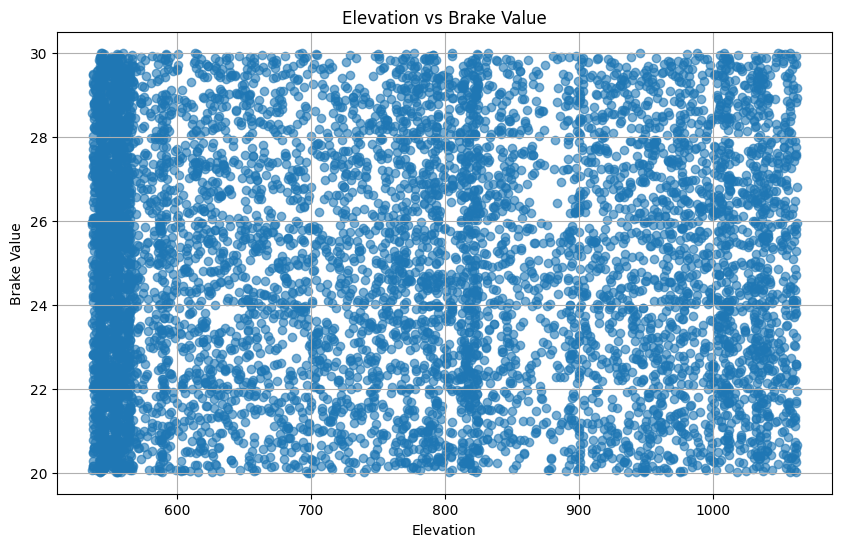

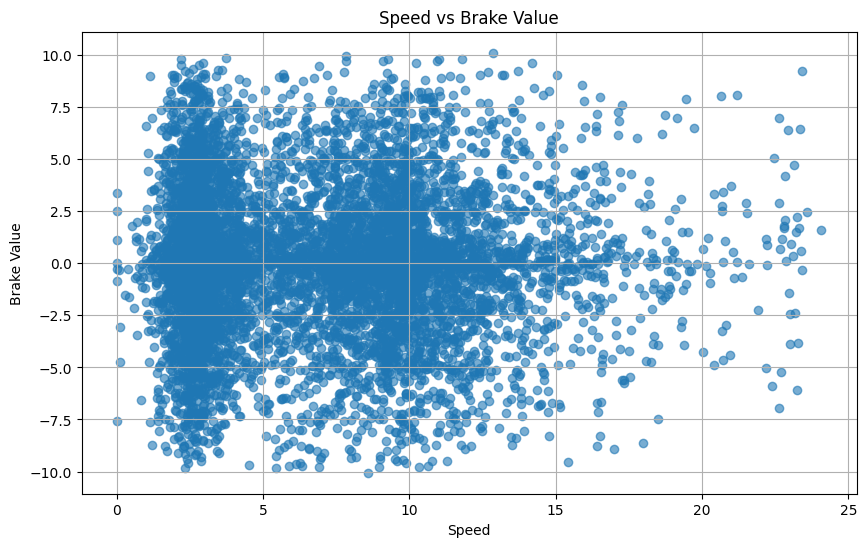

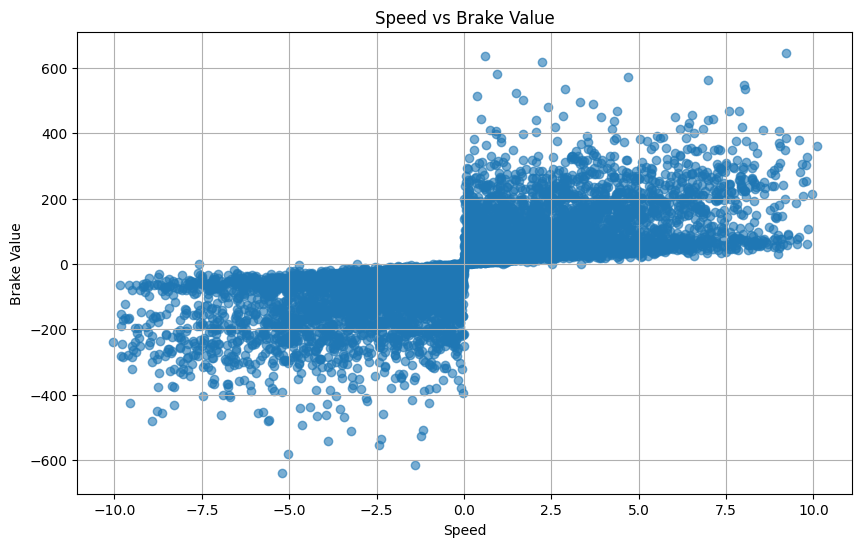

In [54]:
# Display correlations
plt.figure(figsize=(10,6))
plt.scatter(combined_data['elevation'], combined_data['Temperature'], alpha=0.6)
plt.title('Elevation vs Brake Value')
plt.xlabel('Elevation')
plt.ylabel('Brake Value')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(combined_data['Speed_m/s'], combined_data['Brake_Power_Torque_W'], alpha=0.6)
plt.title('Speed vs Brake Value')
plt.xlabel('Speed')
plt.ylabel('Brake Value')
plt.grid(True)
plt.show()


plt.figure(figsize=(10,6))
plt.scatter(combined_data['Brake_Power_Torque_W'], combined_data['Brake_Power_Force_W'], alpha=0.6)
plt.title('Speed vs Brake Value')
plt.xlabel('Speed')
plt.ylabel('Brake Value')
plt.grid(True)
plt.show()


In [59]:
import folium
import branca.colormap as cm

# Create a color map based on the brake power values
min_brake_power = combined_data['Speed_m/s'].min()
max_brake_power = combined_data['Speed_m/s'].max()
colormap = cm.LinearColormap(colors=['green', 'yellow', 'red'], vmin=min_brake_power, vmax=max_brake_power)

# Prepare the data for the polyline
locations = list(zip(combined_data['latitude'], combined_data['longitude']))
colors = combined_data['Speed_m/s'].apply(colormap).tolist()

# Create the map centered on the mean location
m = folium.Map(location=[combined_data['latitude'].mean(), combined_data['longitude'].mean()], zoom_start=13)

# Add the colored polyline
for i in range(1, len(locations)):
    folium.PolyLine([locations[i-1], locations[i]], color=colors[i], weight=5).add_to(m)

# Add the colormap to the map as a legend
colormap.caption = "Brake Power"
m.add_child(colormap)

# Save the map
m.save('/map.html')